In [1]:
import json

with open('results.json') as f:
    results = json.load(f)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_instances(features):
    fig, axes = plt.subplots(1, 10)
    fig.set_size_inches(30, 5)
    for i, ax in enumerate(axes):
        image = plt.imread(features[i][0])
        label = features[i][1]
        # image = image / 255.0
        ax.set_title(f"{label}")
        ax.imshow(image)
        ax.set_axis_off()
    plt.show()

In [4]:
def visualize_concept(concept_id=0):
    print(f"Concept #{concept_id}")
    print()
    pair = results[concept_id]
    print(pair["concept"])
    plot_instances(pair["feature"])

Concept #0

[['right', 0.20341277166225571], ['shape', 0.1259295008167988], ['position', 0.11340331620155635], ['canvas', 0.10848588416489159], ['rotate', 0.0969250202302582], ['up', 0.09599423883333631], ['left', 0.09186517562216091], ['white', 0.08718883836722227], ['blank', 0.08583990182090298], ['bottom', 0.07026950709606175]]


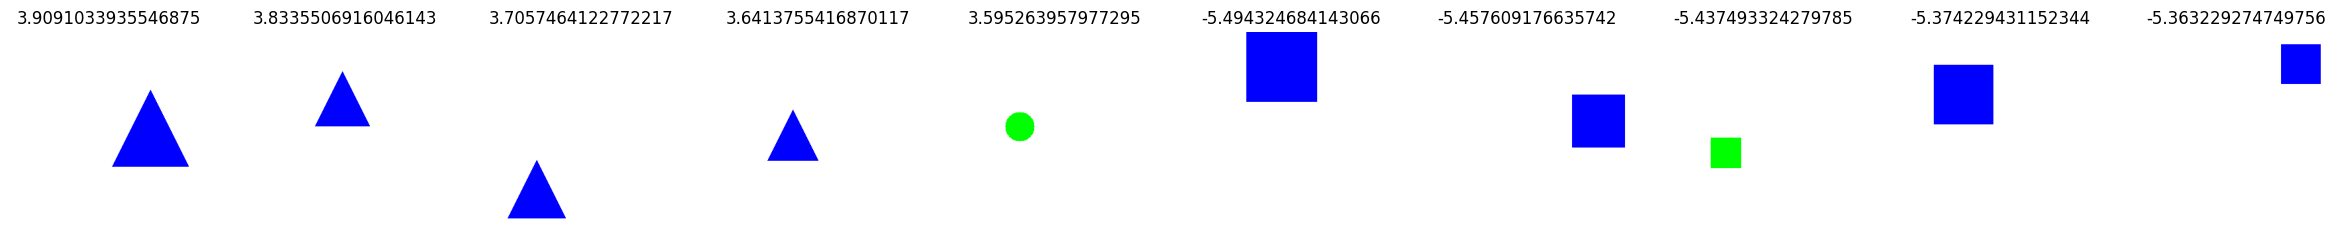

Concept #1

[['green', 0.21564350971361487], ['white', 0.18299954860362183], ['blank', 0.14101527977721973], ['bottom', 0.13140093910399475], ['right', 0.12138612541468902], ['four', 0.1114731958484262], ['angle', 0.10109945983300364], ['<pad>', 0.10025026759481043], ['left', 0.09865767545648486], ['has', 0.09066944063557841]]


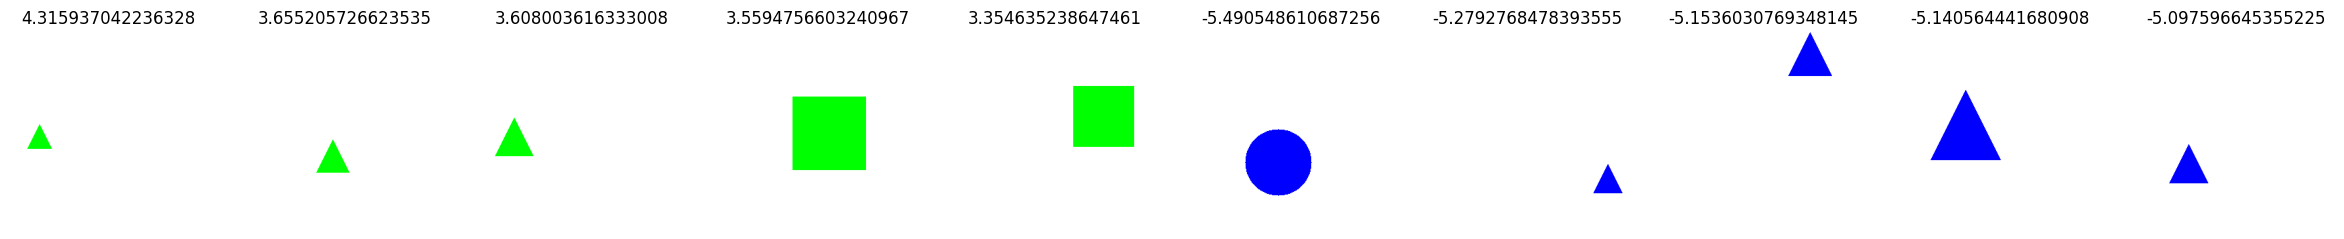

Concept #2

[['green', 0.4126802948371666], ['red', 0.3811376560812559], ['color', 0.23881061538387605], ['blue', 0.18825062435135487], ['shape', 0.1417291604891056], ['three', 0.11851363123916998], ['four', 0.09116225331052533], ['round', 0.08218353487611786], ['blank', 0.05534431093664312], ['up', 0.03952973166020327]]


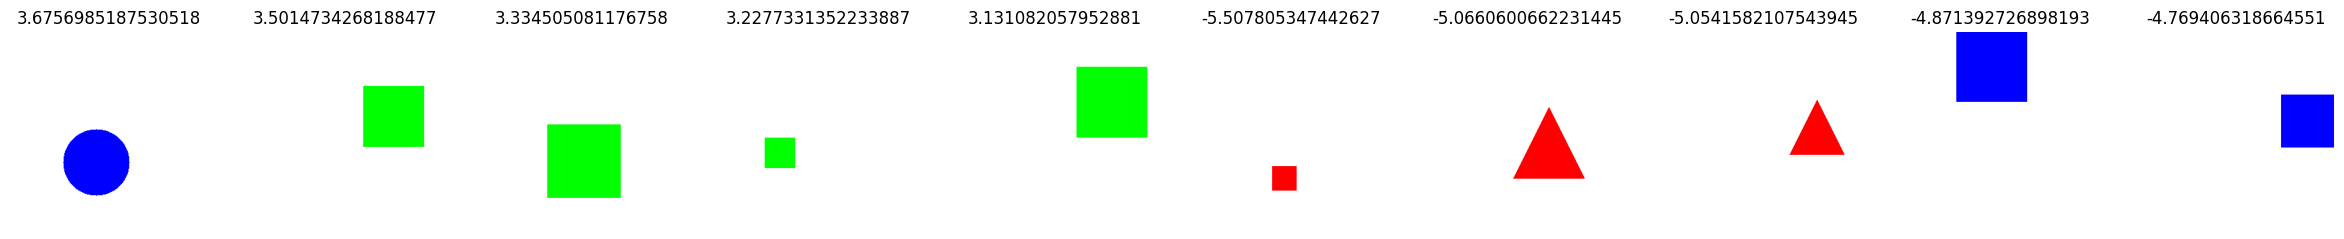

Concept #3

[['color', 0.14592339506317284], ['left', 0.12826757325681085], ['shape', 0.11871633372978789], ['has', 0.10400911095302279], ['blue', 0.10194093727968573], ['is', 0.09945601880308089], ['bottom', 0.095783991844659], ['right', 0.08830225793119209], ['three', 0.08304054653499185], ['rotate', 0.07536967842946801]]


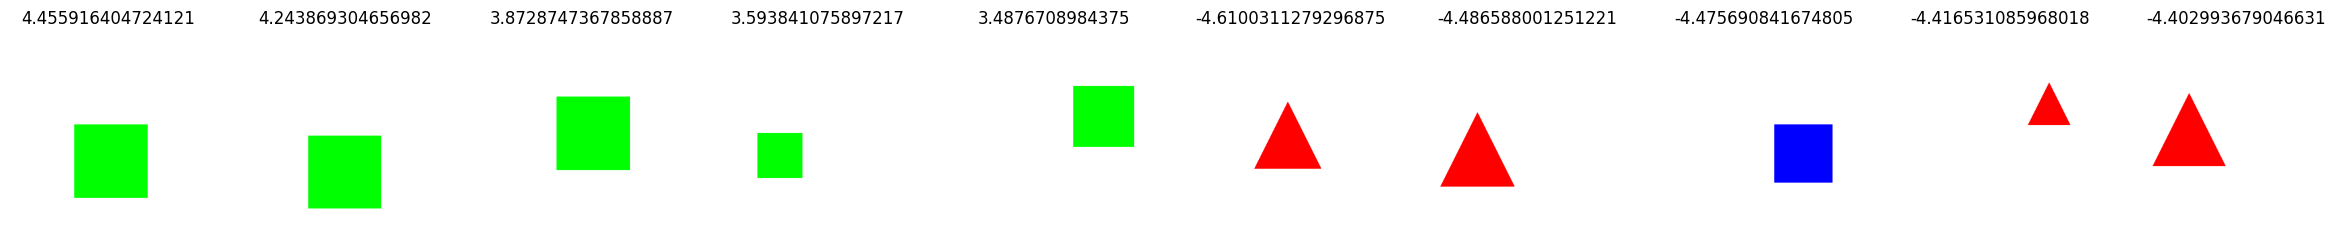

Concept #4

[['this', 0.6259533755178374], ['shape', 0.12772592891280243], ['left', 0.0709362575731884], ['blank', 0.06432962693470765], ['unrotate', 0.038095471207705685], ['canvas', 0.030249368211602776], ['white', 0.023342451189684796], ['angle', 0.021648110372082488], ['bottom', 0.021629809517985023], ['three', 0.020930246024475834]]


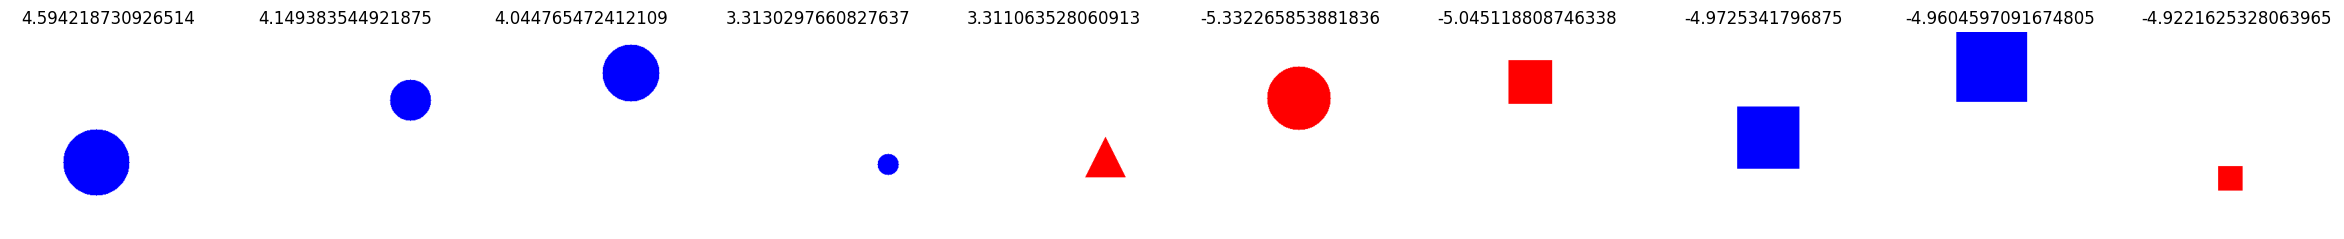

Concept #5

[['blue', 0.2218294543221714], ['angle', 0.2047660037027142], ['left', 0.14860523986213522], ['bottom', 0.11211833620614667], ['right', 0.10619682083684219], ['up', 0.09971473968717817], ['red', 0.09295307689808248], ['blank', 0.08100629896438766], ['rotate', 0.07851699466067077], ['color', 0.07287771675564086]]


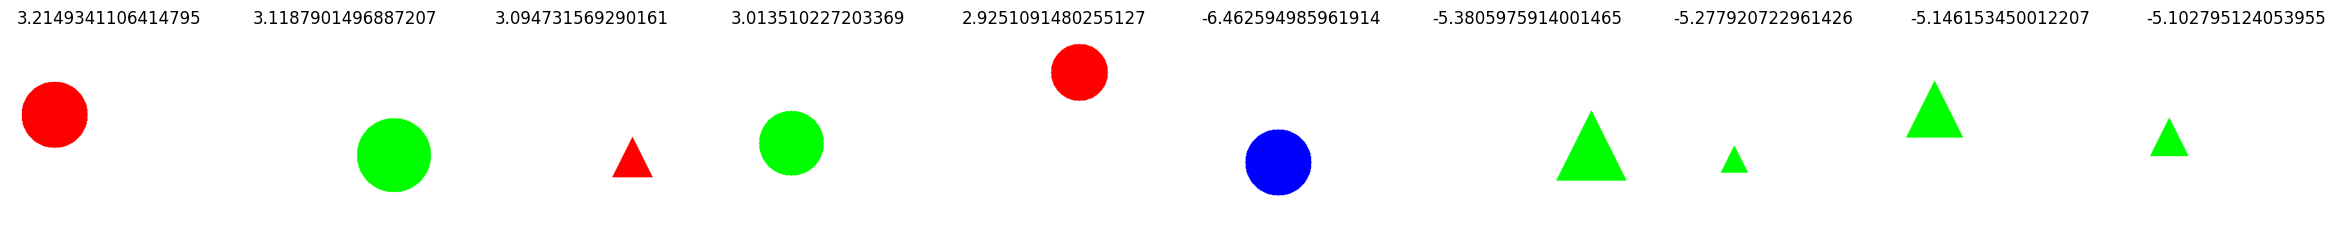

Concept #6

[['this', 0.22638846055117404], ['position', 0.2204829242171311], ['rotate', 0.18764102750713318], ['left', 0.09101488255935491], ['up', 0.0904441703477495], ['right', 0.08930562907497716], ['unrotate', 0.08023701836211522], ['canvas', 0.06368543436816392], ['blank', 0.059446299831403246], ['shape', 0.053581768451990475]]


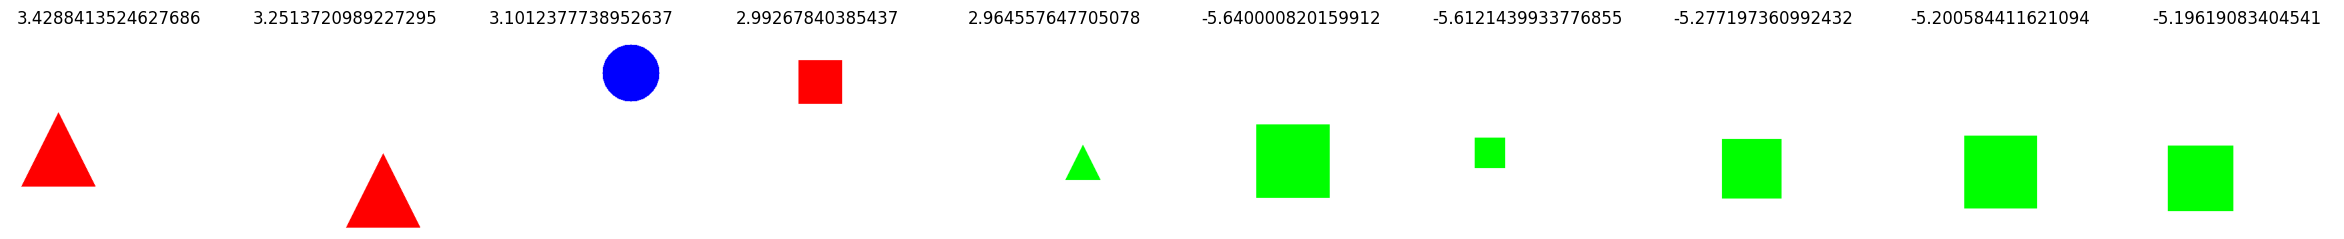

Concept #7

[['green', 0.5579622165458958], ['blue', 0.2114238239037312], ['this', 0.14206612761710394], ['color', 0.13016454561192006], ['rotate', 0.10349413769451522], ['unrotate', 0.0804624382790483], ['four', 0.07318124259572203], ['red', 0.07180533333552805], ['blank', 0.06438801806723757], ['<pad>', 0.06436618910572393]]


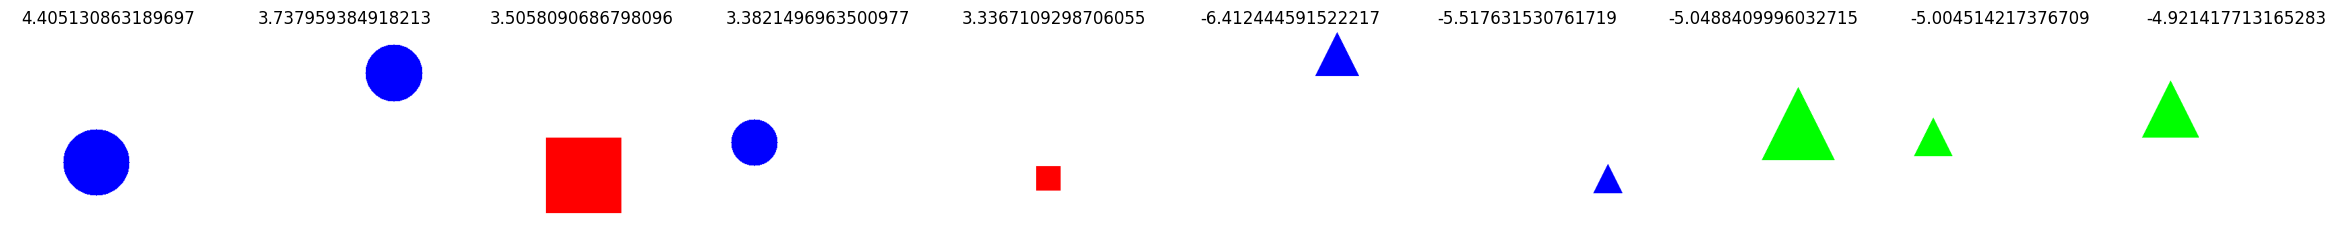

Concept #8

[['is', 0.2766132564564061], ['has', 0.1930725624648536], ['green', 0.15325569333584327], ['blue', 0.1405399819820877], ['color', 0.13642615867743324], ['red', 0.11460820612747495], ['unrotate', 0.08285030559512938], ['rotate', 0.07478458258793154], ['position', 0.07471523223934458], ['left', 0.0686700683906752]]


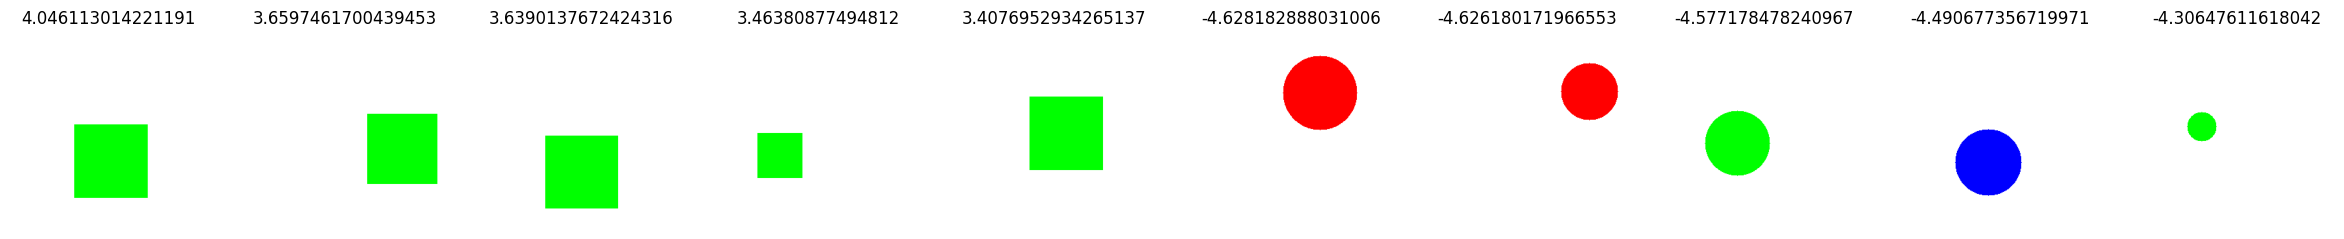

Concept #9

[['shape', 0.22027256669713877], ['position', 0.12976790215103284], ['rotate', 0.10928119272323308], ['blank', 0.10898647031369357], ['canvas', 0.09361223847804677], ['green', 0.0850670386741801], ['red', 0.07608522136763829], ['blue', 0.07537999537175263], ['left', 0.07256455441530914], ['angle', 0.05871836784772757]]


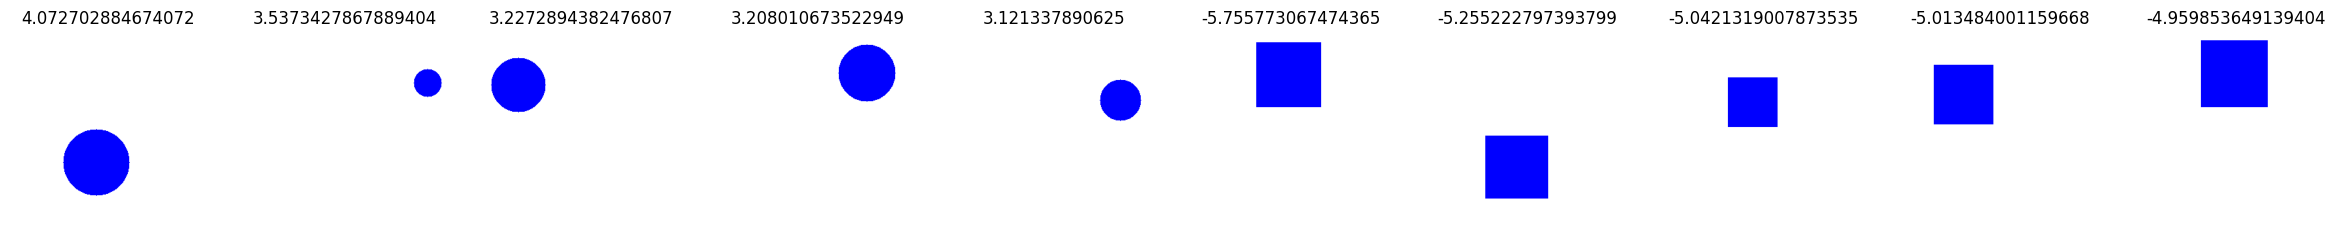

In [5]:
for i in range(10):
    visualize_concept(i)